# Složená tělesa II

## Zadání

U polonekonečné uzavřené skořepiny zatížené vnitřním tlakem proveďte napjatostní analýzu.

## Řešení

Nutné knihovny Pythonu a iPythonu:

In [1]:
import sympy as sp
from IPython.core.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import linspace

Uvolnění:

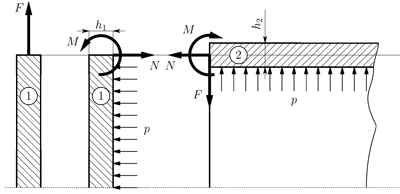

In [2]:
Image(filename='skorepina1.png')

Sázený výstup:

In [3]:
sp.init_printing()

Použité konstanty a symboly:

In [4]:
C1,C2,beta,R,p,E,h2,mu,z,B1,B2,F,M=sp.symbols('C1 C2 beta R p E h2 mu z B1 B2 F M')
h1,r=sp.symbols('h1 r')

### Stěna:

Okrajová podmínka:
\begin{equation}
 \sigma_r^\mathcal{1}=p_\mathcal{1}=\frac{2\pi R\mathcal{F}}{2\pi Rh_\mathcal{1}}=\frac{\mathcal{F}}{h_\mathcal{1}}\quad\mathrm{pro}\;r=R.
\end{equation}

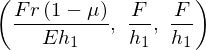

In [5]:
u1,sigma1a_r,sigma1a_t=(1-mu)/E*F/h1*r,F/h1,F/h1
u1,sigma1a_r,sigma1a_t

### Deska:

Okrajová podmínka:
\begin{equation}
 \mathcal{M}_r^\mathcal{1}(r)=\mathcal{M}\quad\mathrm{pro}\;r=R,
\end{equation}
Posouvající síla partikulárního řešení:
\begin{equation}
 2\pi r\mathcal{T^1}=\pi r^2p\Rightarrow \mathcal{T^1}=\frac{pr}{2}.
\end{equation}

Partikulární řešení:

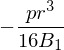

In [6]:
theta1_p=-1/r/B1*sp.integrate(r*sp.integrate(p*r/2,r),r)
theta1_p

Řešení okrajové podminky:

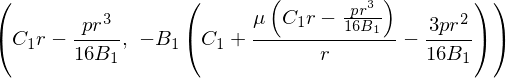

In [7]:
theta1=C1*r+theta1_p
M1_r=-B1*(theta1.diff(r)+mu*theta1/r)
theta1,M1_r

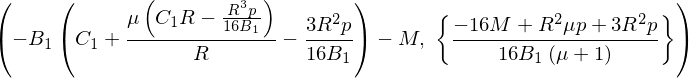

In [8]:
bc=M1_r.subs({r:R})-M
sol1=sp.solveset(bc,C1)
bc,sol1

Natočení $\vartheta^\mathcal{1}$ a momenty $\mathcal{M}_r^\mathcal{1}$ a $\mathcal{M}_t^\mathcal{1}$ desky:

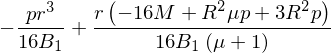

In [9]:
theta1s=theta1.subs({C1:sol1.args[0]})
M1_rs=M1_r.subs({C1:sol1.args[0]})
M1_ts=mu*M1_rs
theta1s

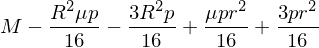

In [10]:
M1_rs.simplify()

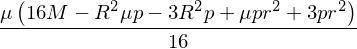

In [11]:
M1_ts.simplify()

### Skořepina:

Partikulární řešení:
\begin{equation}
 2\pi RN^\mathcal{2}_z=-\pi R^2p\Rightarrow-N=N^\mathcal{2}_z=-\frac{Rp}{2}
\end{equation}

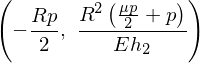

In [12]:
N2_z=-R*p/2
u2_p=R**2/E/h2*(p-mu/R*N2_z)
N2_z,u2_p

Obecné řešení pro posuv $u^\mathcal{2}$, natoceni $\vartheta^{\mathcal{2}}$, moment $\mathcal{M}_z^\mathcal{2}$ a posouvající sílu $\mathcal{T}_z^\mathcal{2}$:

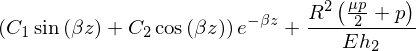

In [13]:
u2=sp.exp(-beta*z)*(C1*sp.sin(beta*z)+C2*sp.cos(beta*z))+u2_p
u2

In [14]:
theta2=u2.diff(z)
theta2

Někdy je lepší si to pěkně upravit růčo a natvrdo přepsat:

In [15]:
theta2=-beta*sp.exp(-beta*z)*(C1*(sp.sin(beta*z)+sp.cos(beta*z))+C2*(-sp.sin(beta*z)+sp.cos(beta*z)))
theta2

In [16]:
M2_z=-B2*theta2.diff(z)
M2_z

Opět svépomocí:

In [17]:
M2_z=-2*B2*beta**2*sp.exp(-beta*z)*(C1*sp.sin(beta*z)+C2*sp.cos(beta*z))
M2_z

In [18]:
T2_zr=-B2*theta2.diff(z,2)
T2_zr

Okrajové podmínky a jejich řešení:
\begin{equation}
  \begin{split}
    \mathcal{M}_z^\mathcal{2}(z) &= -\mathcal{M}\quad\mathrm{pro}\,z=0,\\
    \mathcal{T}_{zr}^\mathcal{2}(z) &=-\mathcal{F}\quad\mathrm{pro}\,z=0.
  \end{split}
\end{equation}

In [19]:
bc1,bc2=M2_z.subs({z:0})+M,T2_zr.subs({z:0})+F
bc1,bc2

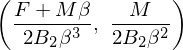

In [20]:
sol1=sp.linsolve([bc1,bc2],[C1,C2])
Cs1,Cs2=sol1.args[0][0],sol1.args[0][1]
Cs1,Cs2

Konečné natočení $\vartheta^\mathcal{2}$, posuv $u^\mathcal{2}$, normálové síly $\mathcal{N}_t^\mathcal{2}$, $\mathcal{N}_z^\mathcal{2}$ a momenty skořepiny $\mathcal{M}_z^\mathcal{2}$, $\mathcal{M}_t^\mathcal{2}$:

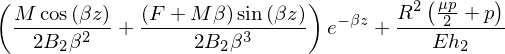

In [21]:
u2s=u2.subs({C1:Cs1,C2:Cs2})
u2s

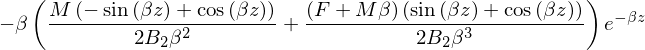

In [22]:
theta2s=theta2.subs({C1:Cs1,C2:Cs2})
theta2s

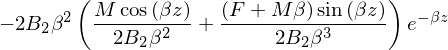

In [23]:
M2_zs=M2_z.subs({C1:Cs1,C2:Cs2})
M2_zs

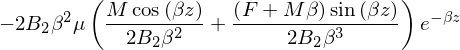

In [24]:
M2_ts=mu*M2_zs
M2_ts

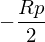

In [25]:
N2_zs=N2_z
N2_zs

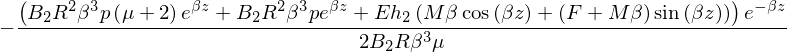

In [26]:
N2_ts=1/mu*(N2_z-E*h2*u2s/R)
sp.simplify(N2_ts)

### Deformační podmínky, vyjádření $\mathcal{F}$ a $\mathcal{M}$

Složená tělesa musí splňovat následující deformační podmínky:

\begin{equation}
  \begin{split}
    \vartheta^\mathcal{1}(r) &= \vartheta^\mathcal{2}(z)\quad\mathrm{pro}\,r=R\wedge z=0, \\
    u^\mathcal{1}(r) &= u^\mathcal{2}(z)\quad\mathrm{pro}\,r=R\wedge z=0.
  \end{split}
\end{equation}

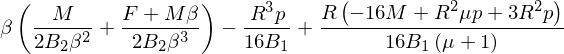

In [27]:
eq1=theta1s.subs({r:R})-theta2s.subs({z:0})
eq2=u1.subs({r:R})-u2s.subs({z:0})
eq1

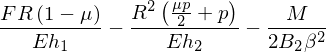

In [28]:
eq2

In [29]:
sol2=sp.linsolve([eq1,eq2],[M,F])
Mf,Ff=sol2.args[0][0],sol2.args[0][1]

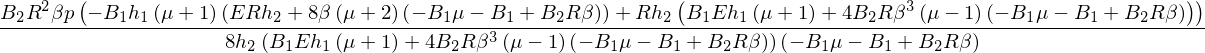

In [30]:
Mf

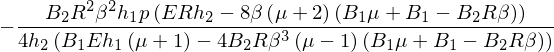

In [31]:
Ff

### Numerický příklad:

Zadané parametry:

In [32]:
h1_,h2_,R_=5.,3.,50.
E_,mu_=2.1e5,0.3
p_=1.
beta_,B1_,B2_=(3*(1-mu_**2)/R_**2/h2_**2)**(1/4.),E_*h1_**3/12./(1-mu_**2),E_*h2_**3/12./(1-mu_**2)
beta_,B1_,B2_

Dosazení hodnot do výrazů pro $\mathcal{M}$ a $\mathcal{F}$.

In [33]:
M_num=Mf.subs({h1:h1_,h2:h2_,R:R_,E:E_,mu:mu_,p:p_,beta:beta_,B1:B1_,B2:B2_})
F_num=Ff.subs({h1:h1_,h2:h2_,R:R_,E:E_,mu:mu_,p:p_,beta:beta_,B1:B1_,B2:B2_})
M_num,F_num

**Stěno deska**

Dosazení zadaných hodnot do $\sigma_r^\mathcal{1}$ a $\sigma_t^\mathcal{1}$.

In [34]:
sigma1_r_plus=sigma1a_r.subs({F:F_num,h1:h1_}) \
              +6*M1_rs.subs({M:M_num,F:F_num,B1:B1_,mu:mu_,h1:h1_,p:p_,R:R_})/h1_**2
sigma1_r_minus=sigma1a_r.subs({F:F_num,h1:h1_}) \
              -6*M1_rs.subs({M:M_num,F:F_num,B1:B1_,mu:mu_,h1:h1_,p:p_,R:R_})/h1_**2
sigma1_r_plus.simplify(),sigma1_r_minus.simplify()

In [35]:
sigma1_t_plus=sigma1a_t.subs({F:F_num,h1:h1_}) \
         +6*M1_ts.subs({M:M_num,F:F_num,B1:B1_,mu:mu_,h1:h1_,p:p_,R:R_})/h1_**3
sigma1_t_minus=sigma1a_t.subs({F:F_num,h1:h1_}) \
         -6*M1_ts.subs({M:M_num,F:F_num,B1:B1_,mu:mu_,h1:h1_,p:p_,R:R_})/h1_**3
sigma1_t_plus.simplify(),sigma1_t_minus.simplify()

Vykreslení $\sigma_r^\mathcal{1}$ a $\sigma_t^\mathcal{1}$.

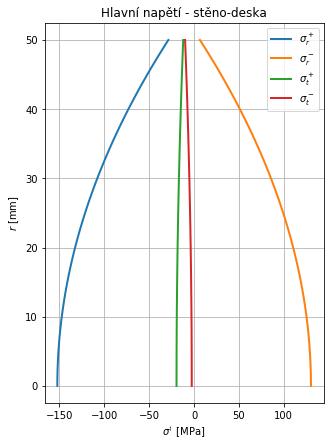

In [36]:
rls=linspace(0.01,R_,50)
plot1=[sigma1_r_plus.evalf(subs={r:ii}) for ii in rls]
plot2=[sigma1_r_minus.evalf(subs={r:ii}) for ii in rls]
plot3=[sigma1_t_plus.evalf(subs={r:ii}) for ii in rls]
plot4=[sigma1_t_minus.evalf(subs={r:ii}) for ii in rls]

fig,ax=plt.subplots(figsize=(5,7))
plt.xlabel('$\sigma^\mathcal{1}$ [MPa]')
plt.ylabel('$r$ [mm]')
plt.title('Hlavní napětí - stěno-deska')
ax.plot(plot1,rls,lw=2,label='$\sigma_r^+$')
ax.plot(plot2,rls,lw=2,label='$\sigma_r^-$')
ax.plot(plot3,rls,lw=2,label='$\sigma_t^+$')
ax.plot(plot4,rls,lw=2,label='$\sigma_t^-$')
ax.legend(loc='best')
ax.grid(True)
plt.show()

Vykreslení redukovaného napětí $\sigma^\mathcal{1}_\mathrm{red}=\big|\sigma^\mathcal{1}_r-\sigma^\mathcal{1}_t\big|$.

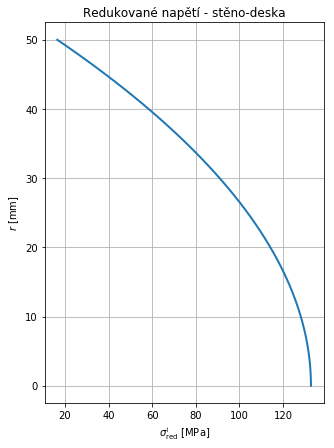

In [37]:
plot5=[abs(sigma1_t_plus.evalf(subs={r:ii})-sigma1_r_plus.evalf(subs={r:ii})) for ii in rls]

fig,ax=plt.subplots(figsize=(5,7))
plt.xlabel('$\sigma_\mathrm{red}^\mathcal{1}$ [MPa]')
plt.ylabel('$r$ [mm]')
plt.title('Redukované napětí - stěno-deska')
ax.plot(plot5,rls,lw=2)
ax.grid(True)
plt.show()

**Skořepina**

Dosazení zadaných hodnot do $\sigma_r^\mathcal{2}$ a $\sigma_t^\mathcal{2}$.

In [38]:
sigma2_r_plus=N2_zs.subs({F:F_num,h2:h2_,B2:B2_,R:R_,p:p_})/h2_ \
              +6*M2_zs.subs({M:M_num,F:F_num,B2:B2_,mu:mu_,h2:h2_,p:p_,beta:beta_})/h2_**2
sigma2_r_minus=N2_zs.subs({F:F_num,h2:h2_,B2:B2_,R:R_,p:p_})/h2_ \
               -6*M2_zs.subs({M:M_num,F:F_num,B2:B2_,mu:mu_,h2:h2_,p:p_,beta:beta_})/h2_**2
sigma2_r_plus.simplify()

In [39]:
sigma2_r_minus.simplify()

In [40]:
sigma2_t_plus=N2_ts.subs({M:M_num,F:F_num,h2:h2_,B2:B2_,R:R_,p:p_,beta:beta_,mu:mu_,E:E_})/h2_ \
              +6*M2_ts.subs({M:M_num,F:F_num,B2:B2_,mu:mu_,h2:h2_,p:p_,beta:beta_})/h2_**2
sigma2_t_minus=N2_ts.subs({M:M_num,F:F_num,h2:h2_,B2:B2_,R:R_,p:p_,beta:beta_,mu:mu_,E:E_})/h2_ \
               -6*M2_ts.subs({M:M_num,F:F_num,B2:B2_,mu:mu_,h2:h2_,p:p_,beta:beta_})/h2_**2
sigma2_t_plus.simplify()

In [41]:
sigma2_t_minus.simplify()

Vykreslení $\sigma_r^\mathcal{2}$ a $\sigma_t^\mathcal{2}$.

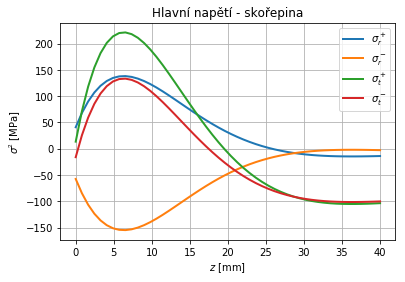

In [42]:
rls=linspace(0.01,40.,50)
plot1=[sigma2_r_plus.evalf(subs={z:ii}) for ii in rls]
plot2=[sigma2_r_minus.evalf(subs={z:ii}) for ii in rls]
plot3=[sigma2_t_plus.evalf(subs={z:ii}) for ii in rls]
plot4=[sigma2_t_minus.evalf(subs={z:ii}) for ii in rls]

fig,ax=plt.subplots()
plt.ylabel('$\sigma^\mathcal{2}$ [MPa]')
plt.xlabel('$z$ [mm]')
plt.title('Hlavní napětí - skořepina')
ax.plot(rls,plot1,lw=2,label='$\sigma_r^+$')
ax.plot(rls,plot2,lw=2,label='$\sigma_r^-$')
ax.plot(rls,plot3,lw=2,label='$\sigma_t^+$')
ax.plot(rls,plot4,lw=2,label='$\sigma_t^-$')
ax.legend(loc='best')
ax.grid(True)
plt.show()

Vykreslení redukovaného napětí $\sigma^\mathcal{2}_\mathrm{red}=\big|\sigma^\mathcal{2}_r-\sigma^\mathcal{2}_t\big|$.

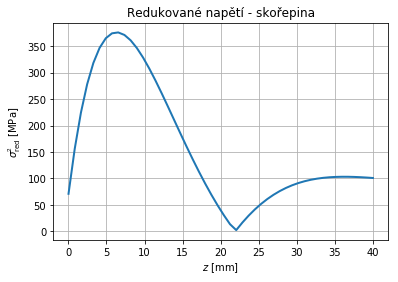

In [43]:
plot5=[abs(sigma2_r_minus.evalf(subs={z:ii})-sigma2_t_plus.evalf(subs={z:ii})) for ii in rls]

fig,ax=plt.subplots()
plt.ylabel('$\sigma_\mathrm{red}^\mathcal{2}$ [MPa]')
plt.xlabel('$z$ [mm]')
plt.title('Redukované napětí - skořepina')
ax.plot(rls,plot5,lw=2)
plt.grid(True)
plt.show()